# U1B model: neutrino masses + DM scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

In [4]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

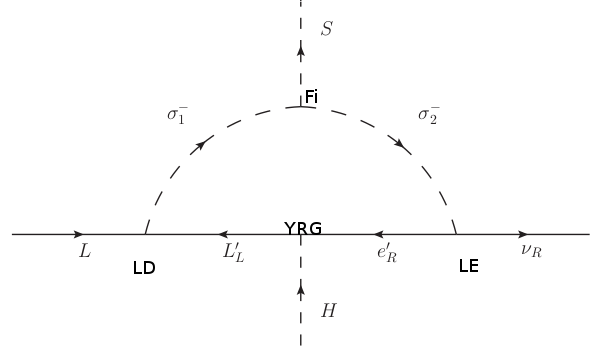

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

Read the scanning

In [7]:
#Read old file
xd = pd.read_csv('general-scan.csv')
del xd['Unnamed: 0']

xd.shape

(115103, 105)

## Dark matter $\Omega h^2$
Planck results 2018

In [8]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


In [9]:
xd = xd[np.logical_and(xd.Omega > Omega_min, xd.Omega < Omega_max)]

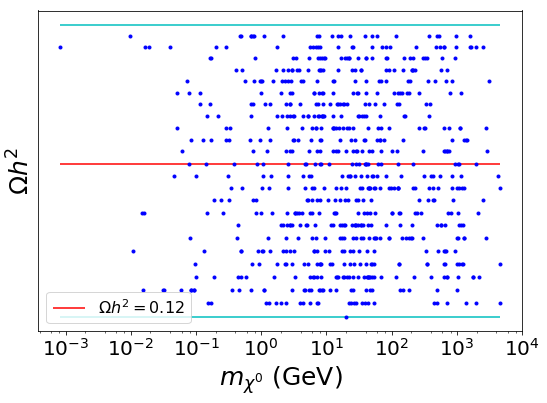

In [60]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi,xd.Omega,'b.',label=r'')

plt.hlines(Omega_max,xd.mchi.min(),xd.mchi.max(), 'c',label=r'')
plt.hlines(Omega_min,xd.mchi.min(),xd.mchi.max(), 'c',label=r'')

plt.hlines(Omega,xd.mchi.min(),xd.mchi.max(), 'r',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
#plt.savefig('plots/DM_mchi.pdf')
plt.show()

## Neutrino masses
Status of neutrino oscillations 2018: first hint for normal mass ordering and improved CP sensitivity. https://arxiv.org/abs/1708.01186

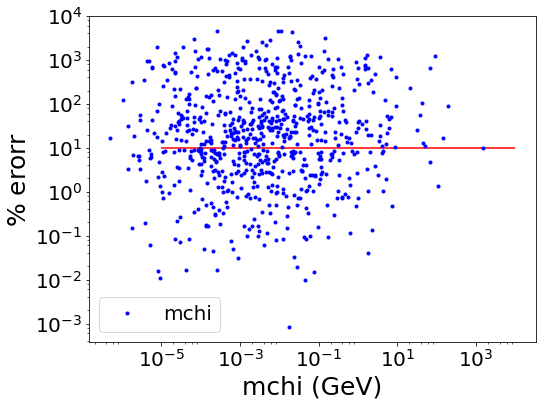

In [21]:
plt.figure(figsize=(8,6))


plt.hlines(10, 1e-5,1e4,'r')

plt.loglog(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2,xd.mchi,'b.')

plt.xlabel(r'mchi (GeV)',size=25)
plt.ylabel(r'$\%$ erorr',size=25)
plt.legend()

plt.show()

Improbing the reconstruction of the neutrino masses to the $10\%$

In [17]:
xd = xd[np.logical_and(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2<10., np.abs(xd.mnu3-xd.mv3)*100/xd.mv3<10.)]

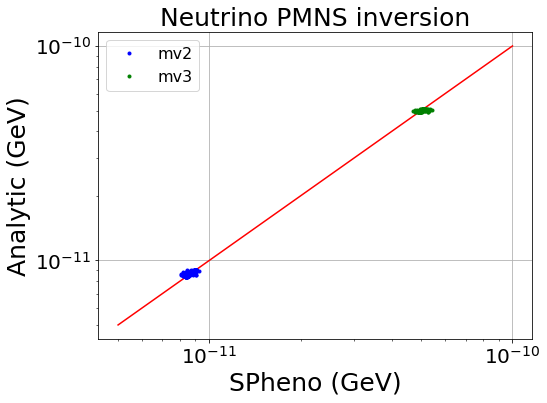

In [22]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

plt.loglog(xd.mnu2,xd.mv2,'b.')
plt.loglog(xd.mnu3,xd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPheno (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')
plt.show()

### Z' mass

\begin{equation}
M_{Z^{'}} =Q_{\Phi}g^{'} v_\Phi =  5 g^{'} v_\Phi
\end{equation}

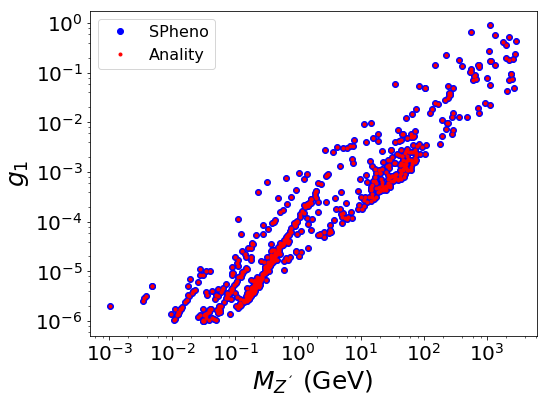

In [26]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MZp,xd.g1p,'bo',label='SPheno')

plt.loglog(5.*xd.g1p*xd.vx,xd.g1p,'r.',label='Anality')

plt.xlabel(r'$M_{Z^{´}}$ (GeV)',size=25)
plt.ylabel(r'$g_1$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
#plt.savefig('plots/g1_MZp.pdf')
plt.show()

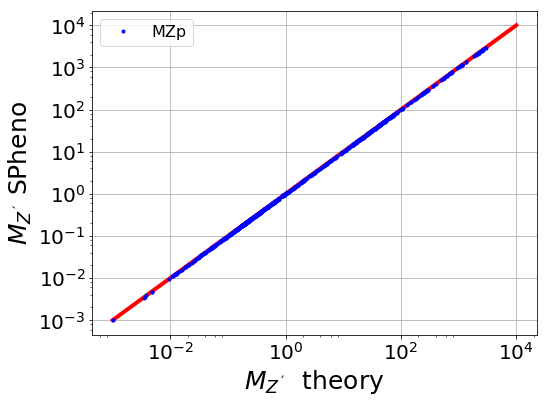

In [39]:
plt.figure(figsize=(8,6))

a = np.linspace(1e-3,1e+4,5)
plt.plot(a,a,'r-', linewidth=4)

plt.loglog(5.*xd.g1p*xd.vx,xd.MZp,'b.')

plt.xlabel(r'$M_{Z^{´}}$  theory',size=25)
plt.ylabel(r'$M_{Z^{´}}$ SPheno',size=25)
plt.grid()

plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
plt.show()

# Direct and indirec detection

In [40]:
from indirectdirect import *

In [41]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

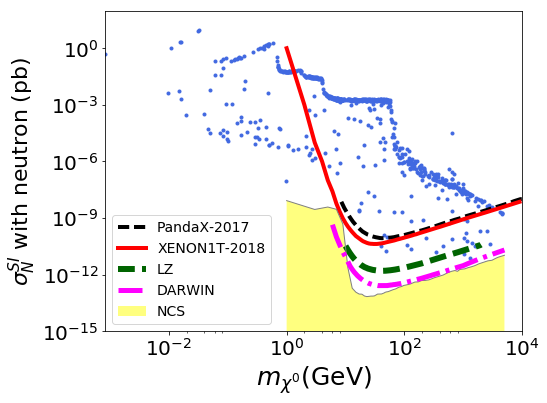

In [49]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=6,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=5,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')

plt.xlim(xd.mchi.min(),1.0e4)
plt.ylim(1e-15,1e2)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

$\sigma_{SD}$

In [45]:
from scipy import interpolate

#LZ-1802.06039
names3 = ['MDM', 'LZSD']
lz = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SD-neutron-prosp-2018.csv',names=names3, header=None)
LZSD=interpolate.interp1d(lz.MDM,lz.LZSD)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SD.csv', names=names1, header=None)
DARSD=interpolate.interp1d(dd1.MDM,dd1.DAR)

#XENON SD 2019
names2 = ['MDM', 'XENON1TSD']
xeSD=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/SD-2019/neutron.csv',names=names2, header=None)
XENON1TSD=interpolate.interp1d(xeSD.MDM,xeSD.XENON1TSD)

#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX  neutrons 1705.03380
names4 = ['M', 'sigmaSD']
luxSD = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX-SD-neutron-2017.csv',names=names4, header=None)
LUX_SD_n = interpolate.interp1d(luxSD.M, luxSD.sigmaSD)

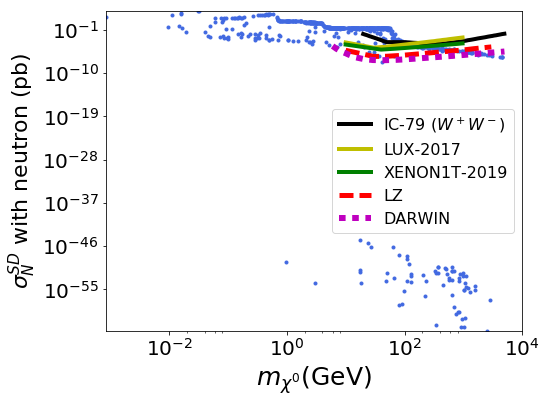

In [55]:
plt.figure(figsize=(8,6))
#For neutrons
plt.loglog(xd.mchi,xd['SDN'], color='royalblue', marker='o',ms=3,linestyle='',label='')

#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=4,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
n=np.arange(10,990,20)
plt.plot(n,LUX_SD_n(n),'y',lw=4,label='LUX-2017')

#XENON1T
nx=np.arange(10,990,30)
plt.loglog(nx,XENON1TSD(nx)*1e+36,'g-',lw=4,label='XENON1T-2019')
#LZ-1802.06039
nn=np.arange(10,3000,20)
plt.loglog(nn,LZSD(nn)*1e+36,'r--',lw=5,label='LZ')

# DARWIN SD
n=np.arange(6,5000)
plt.loglog(n,DARSD(n)*1e+36,'m:',lw=6,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SD}$ with neutron (pb)',size=22)
plt.legend(prop={'size':16},loc='best')
plt.xlim(xd.mchi.min(),1.0e4)
plt.ylim(xd.SDN.min(),xd.SDN.max())

plt.tight_layout()
#plt.savefig('plots/SD.pdf')
plt.show()

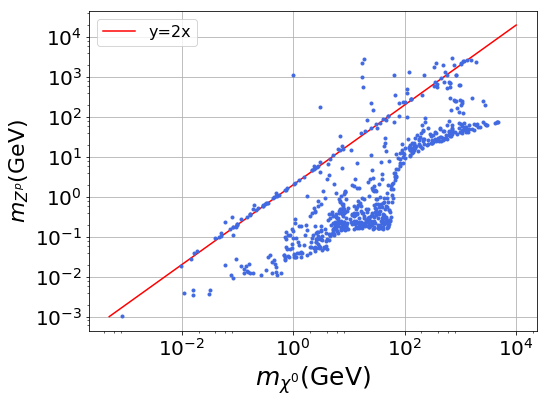

In [56]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-4,1e+4,5)
plt.plot(a,2*a,'r-',label='y=2x')

plt.loglog(xd.mchi,xd.MZp, color='royalblue', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$m_{Z^p}$(GeV)',size=22)
plt.legend(prop={'size':16},loc='best')
#plt.xlim(9,2.0e3)
#plt.ylim(1e-20,2e-1)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_vs_mZp.pdf')
plt.show()

# $a_{\mu}=\dfrac{(g-2)\tau}{2}=116592040(54)\times 10^{-11}$ Fermilab

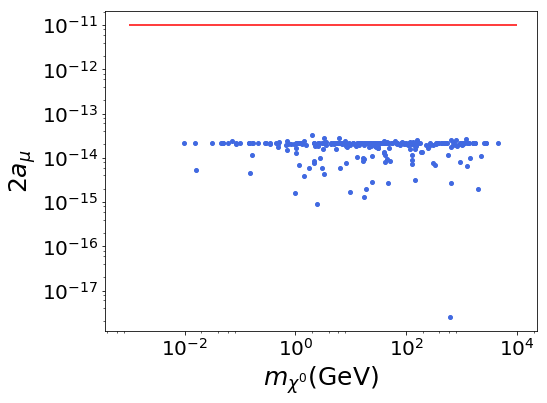

In [57]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.g2mu, color='royalblue', marker='o',ms=4,linestyle='',label='')

plt.hlines(1e-11,1e-3,1e4,'r')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$2 a_{\mu}$',size=25)
#plt.legend(prop={'size':16},loc='lower left')

plt.tight_layout()
plt.show()

# STU parameters

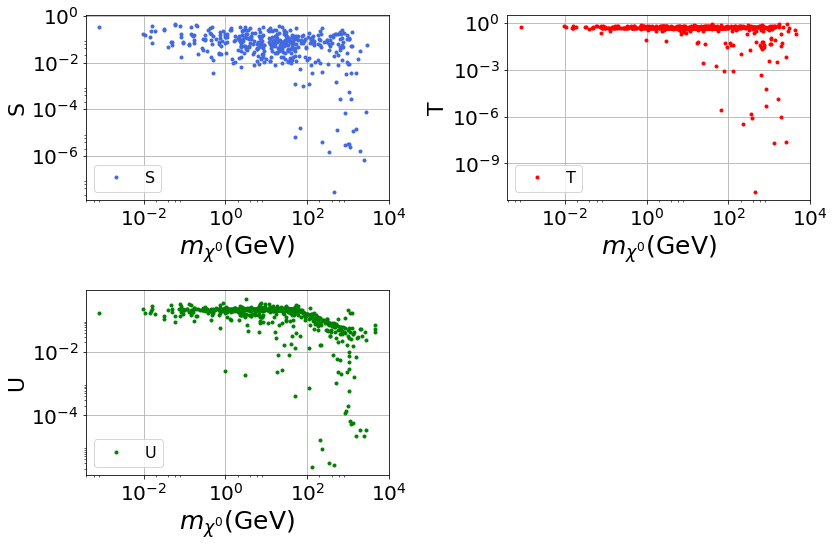

In [91]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mchi, xd['S'], color='royalblue', marker='o',ms=3,linestyle='',label='S')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'S',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mchi, xd['T'], color='r', marker='o',ms=3,linestyle='',label='T')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'T',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.mchi, xd['U'], color='g', marker='o',ms=3,linestyle='',label='U')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'U',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_STU.pdf')
plt.show()

## $\sigma v$ today

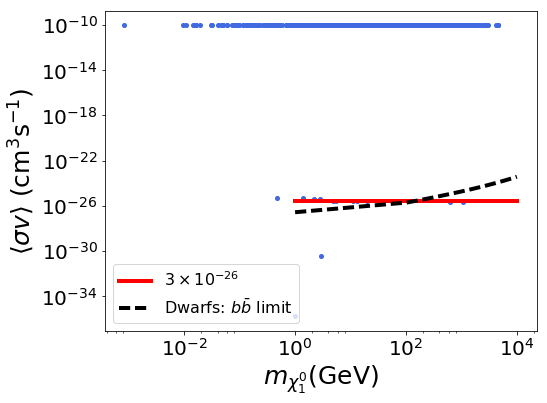

In [58]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.sv, color='royalblue', marker='o',ms=4,linestyle='',label='')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=4,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':16},loc='lower left')
#plt.xlim(9,2e3)
#plt.ylim(1e-36,1e-24)

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
#plt.show()

# 